#PHẦN MÔ HÌNH K- TRUNG BÌNH (K-MEANS MODEL)

##Ví dụ 1

In [1]:
# Gọi các thư viện cần thiết
# Ta tự xây dựng phần k-means nên sẽ không gọi sklearn
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)
# Kỳ vọng và hiệp phương sai của 3 cụm dữ liệu
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
# Số điểm mỗi cụm dữ liệu
N = 500
# Tạo các cụm dữ liệu qua phân bố chuẩn (Gaussian)
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# Tổng hợp dữ liệu từ các cụm
X = np.concatenate((X0, X1, X2), axis = 0)
# Số cụm = 3
K = 3
# Gán nhãn ban đầu cho các cụm, sau đó ta test model và so sánh
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

def kmeans_display(X, label):
  K = np.amax(label) + 1
  X0 = X[label == 0, :]
  X1 = X[label == 1, :]
  X2 = X[label == 2, :]
  plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
  plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
  plt.axis('equal')
  plt.plot()
  plt.show()

def kmeans_init_centers(X, k):
# randomly pick k rows of X as initial centers
  return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
  # calculate pairwise distances btw data and centers
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))
  for k in range(K):
    # collect all points assigned to the k-th cluster
    Xk = X[labels == k, :]
    # take average
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

def has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) ==
  set([tuple(a) for a in new_centers]))

def kmeans_m(X, K):
  centers = [kmeans_init_centers(X, K)]
  labels = []
  it = 0
  while True:
    labels.append(kmeans_assign_labels(X, centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1], K)
    if has_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
    it += 1
  return (centers, labels, it)



Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


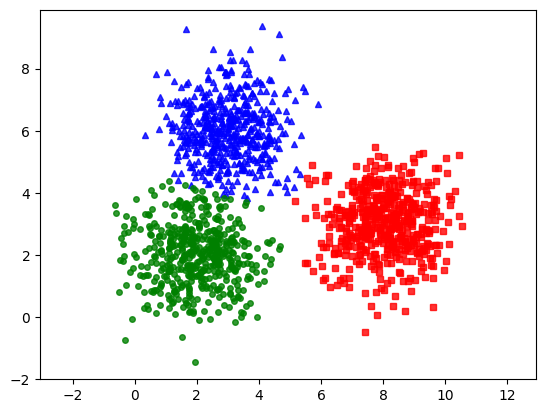

In [2]:
(centers, labels, it) = kmeans_m(X, K)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

In [3]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
# print('Centers found by scikit-learn:')
# print(kmeans.cluster_centers_)
# pred_label = kmeans.predict(X)
# kmeans_display(X, pred_label)

####Bài tập tự làm 1.1

In [11]:
!gunzip /content/t10k-labels-idx1-ubyte

In [13]:
!gunzip /content/t10k-images-idx3-ubyte

In [14]:
mndata = MNIST('/content')  # Adjust path if needed
mndata.load_testing()
X = mndata.test_images
y = mndata.test_labels  # Load the true labels!
X0 = np.asarray(X)[:1000, :] / 256.0  # Using the first 1000 images for speed
X = X0
K = 10

K-Means converged after 33 iterations.


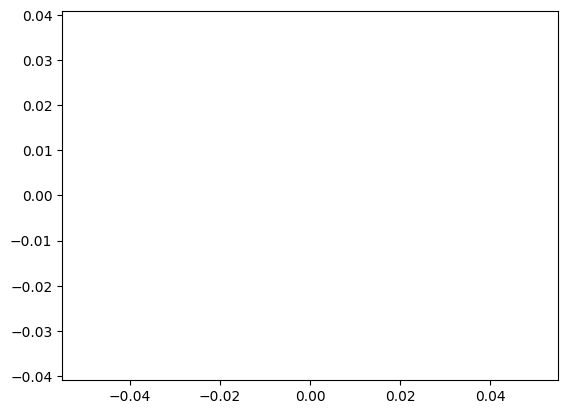


Phân tích phân bố nhãn trong các cụm:


<ipython-input-15-088480ca0c4b>:13: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  cluster_indices = np.where(final_labels == k)[0]
<ipython-input-15-088480ca0c4b>:32: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  cluster_indices = np.where(final_labels == k)[0]


<Figure size 1500x1200 with 0 Axes>


Tổng tỷ lệ phân lớp đúng: 0.0850
Tổng tỷ lệ phân lớp sai: 0.9150


<ipython-input-15-088480ca0c4b>:49: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  cluster_indices = np.where(final_labels == k)[0]


In [15]:
(centers, final_labels, iterations) = kmeans_m(X, K)
print("K-Means converged after", iterations, "iterations.")

kmeans_display(X, final_labels)  # Display the clustering


# --- Additional Evaluation Metrics ---

# 1. Phân tích phân bố nhãn trong các cụm
print("\nPhân tích phân bố nhãn trong các cụm:")
for k in range(K):
    # Đếm số lượng mẫu thuộc mỗi nhãn trong cụm k
    cluster_indices = np.where(final_labels == k)[0]
    cluster_size = len(cluster_indices)
    if cluster_size > 0:
        # Đếm số lượng mẫu của từng nhãn trong cụm
        label_counts = np.bincount(y[cluster_indices], minlength=10)
        # Nhãn phổ biến nhất trong cụm
        dominant_label = np.argmax(label_counts)
        dominant_count = label_counts[dominant_label]
        purity = dominant_count / cluster_size

        print(f"Cụm {k}: Kích thước = {cluster_size}, Nhãn phổ biến = {dominant_label}")
        print(f"    Phân phối nhãn: {label_counts}")
        print(f"    Độ thuần khiết: {purity:.4f}")
        print(f"    Tỷ lệ phân lớp sai: {1 - purity:.4f}")
        print("-" * 50)

# 2. Hiển thị một số mẫu đại diện từ mỗi cụm
plt.figure(figsize=(15, 12))
for k in range(K):
    cluster_indices = np.where(final_labels == k)[0]
    if len(cluster_indices) > 0:
        # Lấy 5 mẫu đầu tiên trong cụm
        samples = min(5, len(cluster_indices))
        for i in range(samples):
            plt.subplot(K, 5, k * 5 + i + 1)
            plt.imshow(X[cluster_indices[i]].reshape(28, 28), cmap='gray')
            plt.title(f"Cụm {k}, Nhãn {y[cluster_indices[i]]}")
            plt.axis('off')
plt.tight_layout()
plt.savefig('kmeans_samples.png')
plt.show()

# 3. Tính tổng tỷ lệ phân lớp sai
# Gán mỗi cụm cho nhãn phổ biến nhất trong cụm đó
cluster_to_digit = np.zeros(K, dtype=int)
for k in range(K):
    cluster_indices = np.where(final_labels == k)[0]
    if len(cluster_indices) > 0:
        label_counts = np.bincount(y[cluster_indices], minlength=10)
        cluster_to_digit[k] = np.argmax(label_counts)

# Tính tỷ lệ mẫu được gán đúng
predicted_labels = cluster_to_digit[final_labels]
accuracy = np.mean(predicted_labels == y[:1000])
print(f"\nTổng tỷ lệ phân lớp đúng: {accuracy:.4f}")
print(f"Tổng tỷ lệ phân lớp sai: {1 - accuracy:.4f}")

##Ví dụ 2

In [16]:
!pip install python-mnist

In [17]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
# Import the imageio module
import imageio

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# This function visualizes filters in matrix A. Each column of A is a
# filter. We will reshape each column into a square image and visualizes
# on each cell of the visualization panel.
# All other parameters are optional, usually you do not need to worry
# about it.
# opt_normalize: whether we need to normalize the filter so that all of
# them can have similar contrast. Default value is true.
# opt_graycolor: whether we use gray as the heat map. Default is true.
# opt_colmajor: you can switch convention to row major for A. In that
# case, each row of A is a filter. Default value is false.

In [19]:
# source: https://github.com/tsaith/ufldl_tutorial
def display_network(A, m=-1, n=-1):
    opt_normalize = True
    opt_graycolor = True

    # Rescale
    A = A - np.average(A)

    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1

    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)

    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))

    if not opt_graycolor:
        image *= 0.1

    k = 0
    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue

            clim = np.max(np.abs(A[:, k]))

            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz,
                      buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz,
                      buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))

            k += 1

    return image


def display_color_network(A):
    """
    # display receptive field(s) or basis vector(s) for image patches
    #
    # A the basis, with patches as column vectors
    # In case the midpoint is not set at 0, we shift it dynamically
    :param A:
    :param file:
    :return:
    """
    if np.min(A) >= 0:
        A = A - np.mean(A)

    cols = np.round(np.sqrt(A.shape[1]))
    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1
    rows = np.ceil(A.shape[1] / cols)
    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]
    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))
    # Initialization of the image
    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))

In [20]:
mndata = MNIST('/content')
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0
K = 10
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 10)


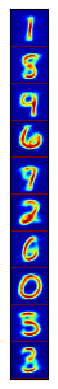

In [21]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)
f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')
# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())
# map the normalized data to colors
# image is now RGBA (512x512x4)
image = cmap(norm(A))


In [22]:
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))
for k in range(K):
  Xk = X0[pred_label == k, :]
  center_k = [kmeans.cluster_centers_[k]]
  neigh = NearestNeighbors(n_neighbors=N0).fit(Xk)
  dist, nearest_id = neigh.kneighbors(center_k, N0)
  X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
  X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

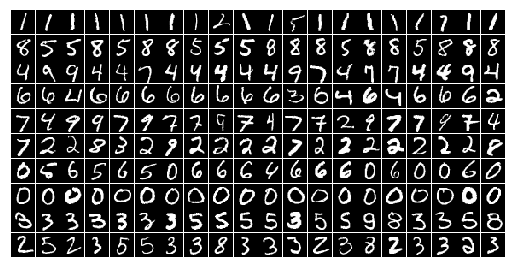

In [23]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

#Mô hình DBScan

##Ví dụ 2.1

In [24]:
class DBSCAN(object):
  def __init__(self,x,epsilon,minpts):
  # The number of input dataset
    self.n = len(x)
    # Euclidean distance
    p, q = np.meshgrid(np.arange(self.n), np.arange(self.n))
    self.dist = np.sqrt(np.sum(((x[p] - x[q])**2),2))
    # label as visited points and noise
    self.visited = np.full((self.n), False)
    self.noise = np.full((self.n),False)
    # DBSCAN Parameters
    self.epsilon = epsilon
    self.minpts = minpts
    # Cluseter
    self.idx = np.full((self.n),0)
    self.C = 0
    self.input = x
  def regionQuery(self, i):
    g = self.dist[i,:] < self.epsilon
    Neighbors = np.where(g)[0].tolist()
    return Neighbors
  def expandCluster(self, i):
    self.idx[i] = self.C
    k = 0
    while True:
      if len(self.neighbors) <= k:return
      j = self.neighbors[k]
      if self.visited[j] != True:
        self.visited[j] = True
        self.neighbors2 = self.regionQuery(j)
        v = [self.neighbors2[i] for i in

        np.where(self.idx[self.neighbors2]==0)[0]]

        if len(self.neighbors2) >= self.minpts:
          self.neighbors = self.neighbors+v
      if self.idx[j] == 0 : self.idx[j] = self.C
      k += 1

####Bài tập tự thực hành 2.1

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Load data
df = pd.read_csv('/content/input.csv') # Replace with the correct path
x = np.zeros((len(df), 2), float)
x[:, 0] = np.array(df['x1'], float)
x[:, 1] = np.array(df['x2'], float)

K-Means converged after 9 iterations.


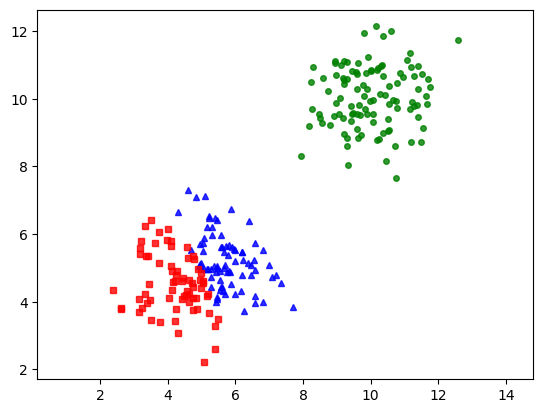

In [26]:
K = 3  # Start with 3 clusters, adjust as needed

(centers, labels, iterations) = kmeans_m(x, K)

print(f"K-Means converged after {iterations} iterations.")
kmeans_display(x, labels[-1])

####Bài tập tự thực hành 2.2

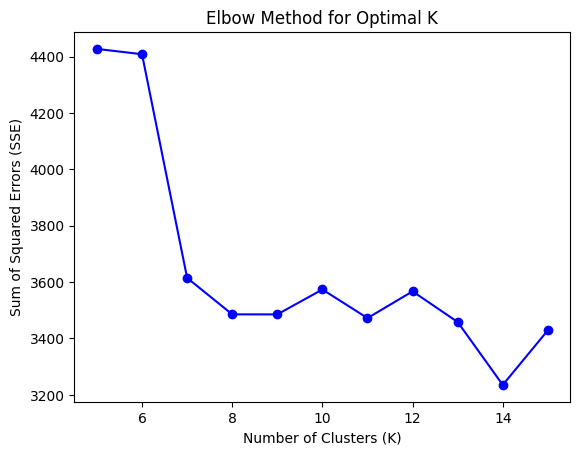


K-Means converged with optimal K = 8 after 21 iterations.

Cluster sizes (scikit-learn K-Means):
Cluster 0: Size = 303
Cluster 1: Size = 3
Cluster 2: Size = 45
Cluster 3: Size = 187
Cluster 4: Size = 69
Cluster 5: Size = 45
Cluster 6: Size = 48
Cluster 7: Size = 111


In [33]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('/content/Sales_Transactions_Dataset_Weekly.csv')  # Replace with the actual path
sales_data = data.iloc[:, 1:53].values

# --- Tiền Xử Lý Dữ Liệu ---
scaler = StandardScaler()
sales_data_scaled = scaler.fit_transform(sales_data)

# --- Determine the optimal number of clusters (K) ---
def calculate_sse(X, labels, centers, K):
    sse = 0
    for k in range(K):
        Xk = X[labels == k, :]
        if Xk.size > 0:
            sse += np.sum((Xk - centers[k])**2)
    return sse

sse_values = []
possible_k_values = range(5, 16)

for k in possible_k_values:
    (centers, labels, it) = kmeans(sales_data_scaled, k)  # Use scaled data
    sse = calculate_sse(sales_data_scaled, labels[-1], centers[-1], k) # Use scaled data
    sse_values.append(sse)

plt.plot(possible_k_values, sse_values, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 8

# --- Run K-Means with the optimal K and display results ---

# Using scikit-learn's KMeans for comparison
kmeans_sklearn = KMeans(n_clusters=optimal_k, random_state=0, n_init=10) # Set n_init explicitly
kmeans_sklearn.fit(sales_data_scaled)
final_labels_sklearn = kmeans_sklearn.labels_

(centers, final_labels, it) = kmeans(sales_data_scaled, optimal_k) # Use scaled data
print(f"\nK-Means converged with optimal K = {optimal_k} after {it} iterations.")


print("\nCluster sizes (scikit-learn K-Means):")
for k in range(optimal_k):
    cluster_indices = np.where(final_labels_sklearn == k)[0]
    print(f"Cluster {k}: Size = {len(cluster_indices)}")